## <font color='Brown'>Python in Electrical Engineering</font> 
### Autumn 2022

#### Lecture 3 - OpenCV in Python 3

## <font color='Brown'>Agenda</font> 
- Computer image representation
- OpenCV and its application
- Image and video import to OpenCV
- Image/video modifications used in objects identification
- Selected objects identification using Cascade Classifier
- Introduction to the assignment

## <font color='Brown'>Important information</font> 


1. Selected fragments of this presentation are based on the following source https://docs.opencv.org/master/d6/d00/tutorial_py_root.html from official OpenCV documentation
2. OpenCV version used is 4.5.4.58
3. The latest Python 3 distribution that is compatibile with OpenCV is Python 3.8
4. Installation of OpenCV in Pycharm: pip install opencv-python


In [59]:
"""" Install necessary libraries """
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install matplotlib

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

You should consider upgrading via the 'c:\Users\darek\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\darek\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\darek\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### <font color='Brown'>Computer image representation</font>

Monochrome (1-bit)
$$ 2^{1} = 2 \space colors $$
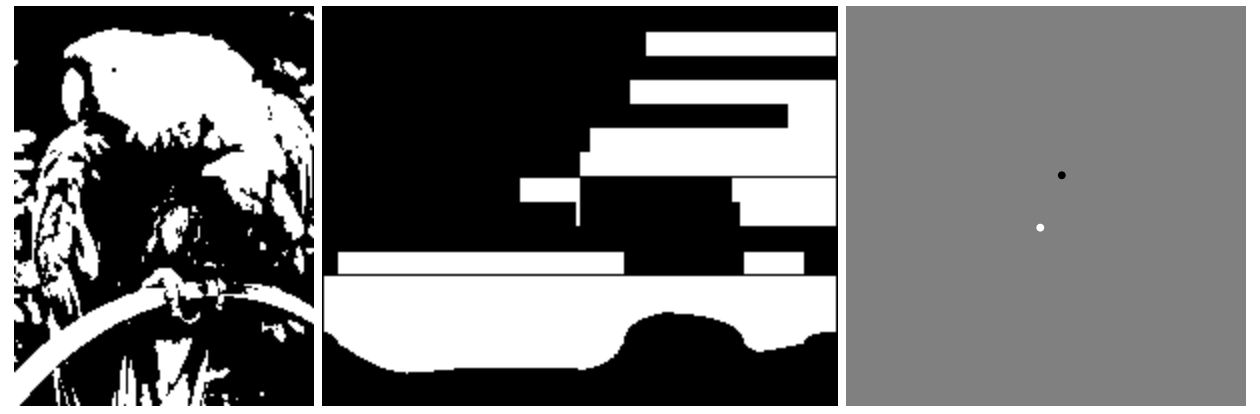
https://en.wikipedia.org/wiki/List_of_monochrome_and_RGB_color_formats


### <font color='Brown'>Computer image representation</font>

2-bit Grayscale
$$ 2^{2} = 4 \space colors $$
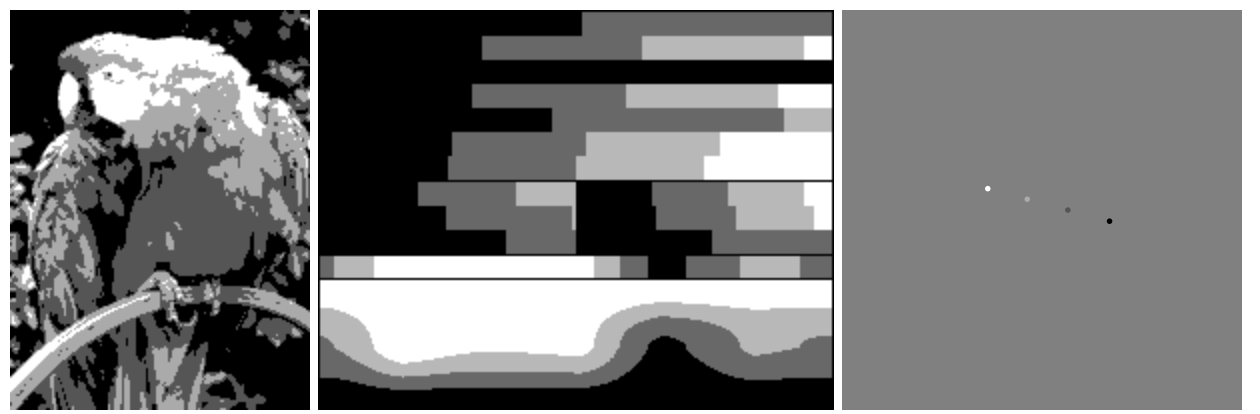
https://en.wikipedia.org/wiki/List_of_monochrome_and_RGB_color_formats


### <font color='Brown'>Computer image representation</font>

8-bit Grayscale
$$ 2^{8} = 256 \space colors $$
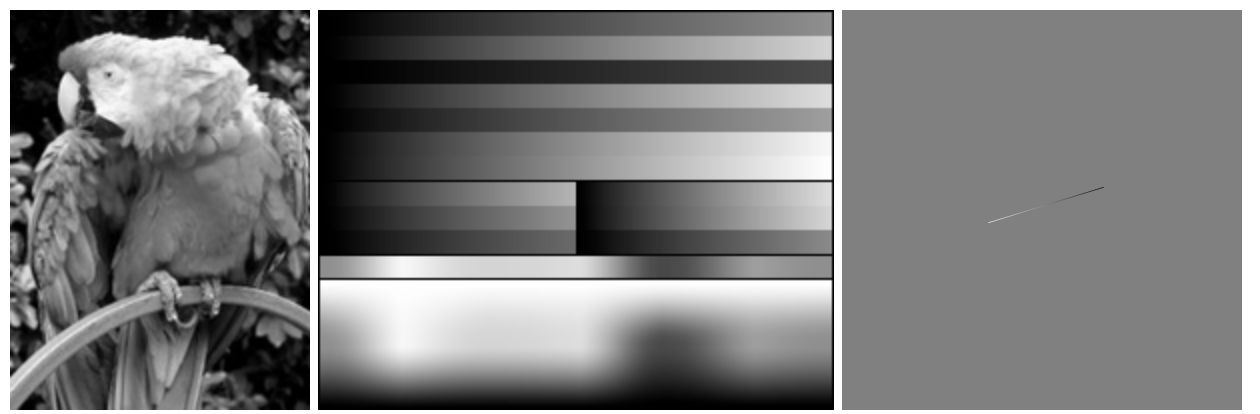
https://en.wikipedia.org/wiki/List_of_monochrome_and_RGB_color_formats


### <font color='Brown'>Computer image representation</font>

3-bit RGB
$$ 2^{1^{3}} = 8 \space colors $$
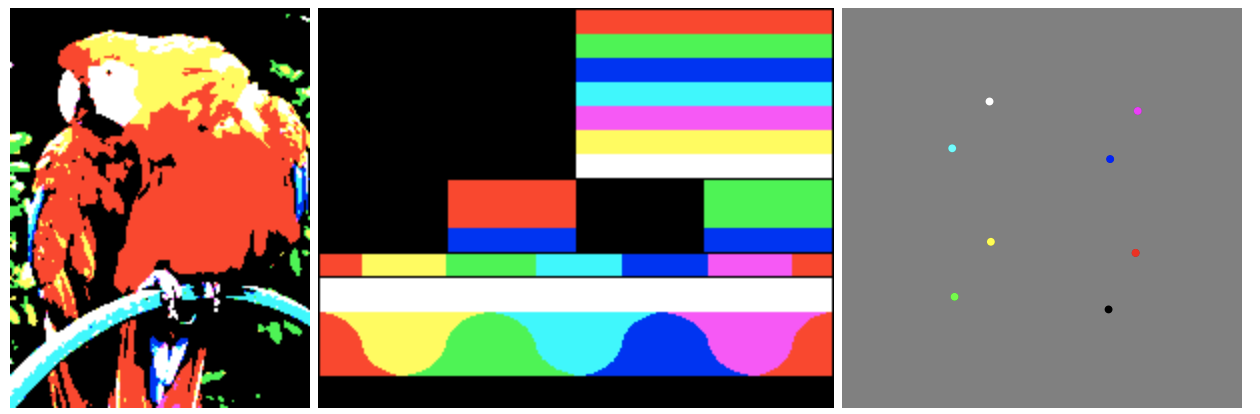
https://en.wikipedia.org/wiki/List_of_monochrome_and_RGB_color_formats


### <font color='Brown'>Computer image representation</font>

24-bit RGB
$$ 2^{8^{3}} = 256^{3} = 16,777,216 \space colors $$
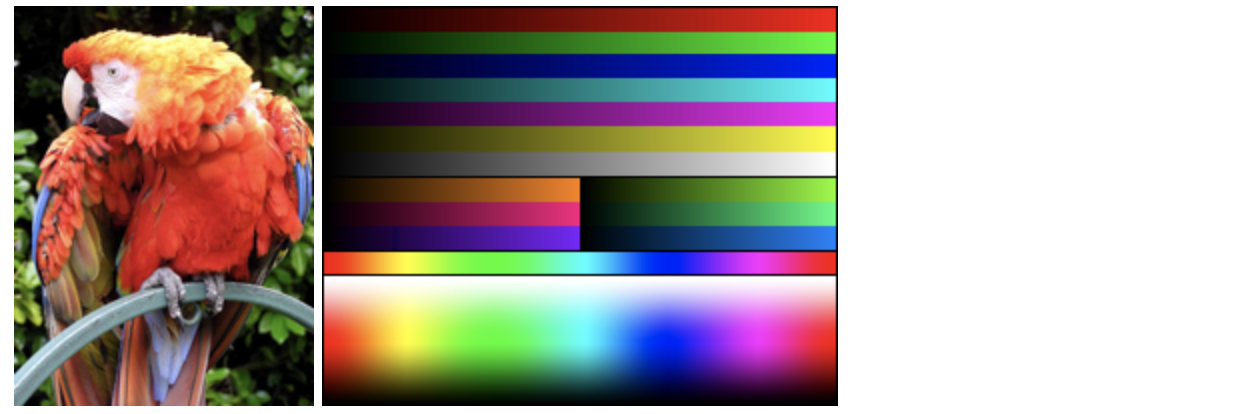
https://en.wikipedia.org/wiki/List_of_monochrome_and_RGB_color_formats


### <font color='Brown'>OpenCV and its applications</font>

- OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. 

- OpenCV provides a common infrastructure for computer vision applications.

- It has C++, Python, Java and MATLAB interfaces and supports Windows, Linux, Android and Mac OS.

Applications include but are not limited to:
- Street view image stitching
- Automated inspection and surveillance
- Robot and driver-less car navigation and control
- Video/image search and retrieval, medical image analysis, 

Basic functionality: 
- Image/video I/O, processing, display
- Object/feature detection

### <font color='Brown'>OpenCV and its applications</font>

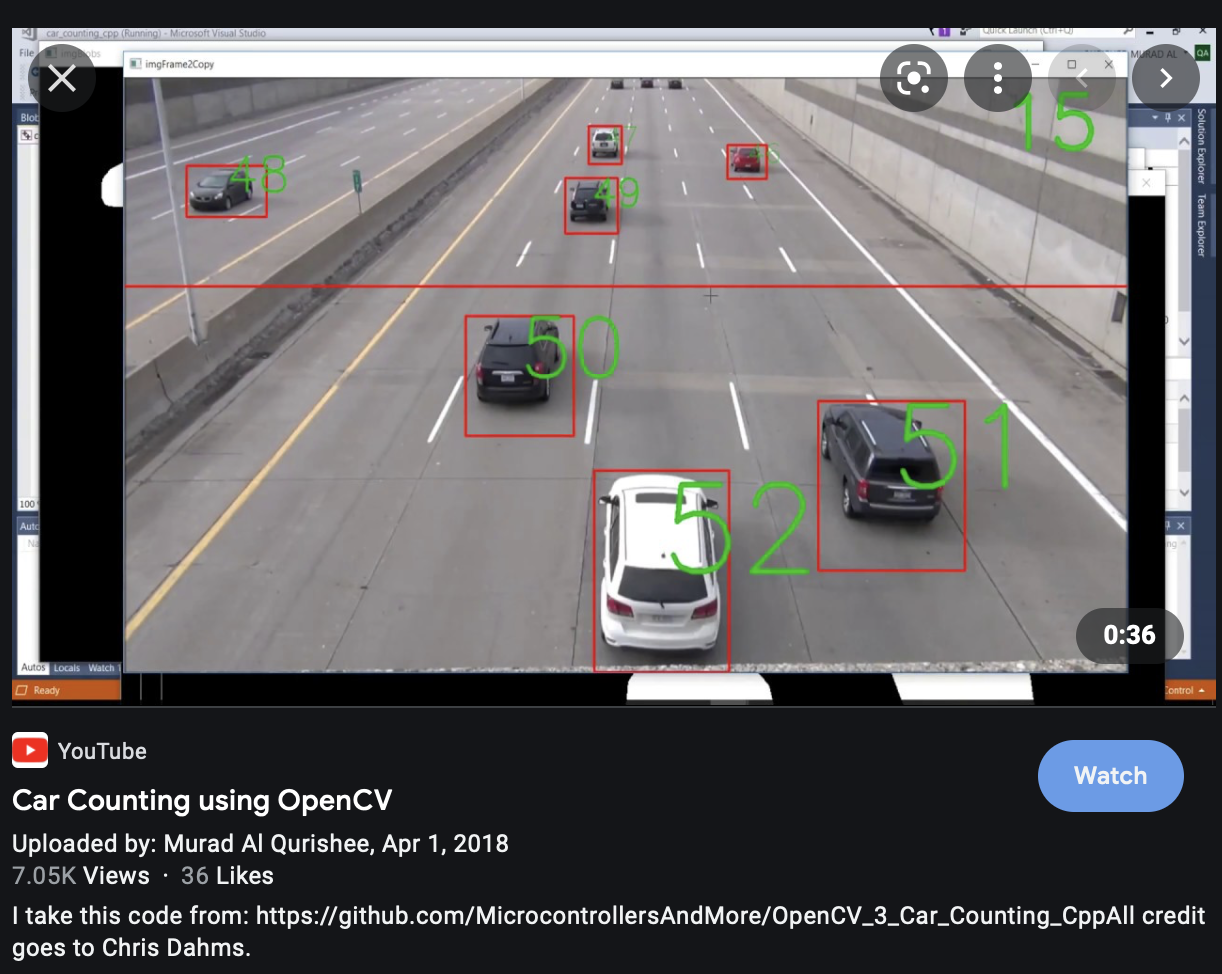

### <font color='Brown'>Image import and show</font>

In [60]:
# Example of error handling

try: 
    img = cv.imread(cv.samples.findFile("images/pexels-jose-mueses-1280560.jpg"))
    print("Image read")
except BaseException as err:
    print("Something went wrong")
else:
    cv.imshow("Image", img)
    print("Image displayed") 
    k = cv.waitKey(0)
    print("Image closed")
    if k == ord("s"):
        cv.imwrite("new_images/image.png", img)
        print("Image saved")

Image read
Image displayed
Image closed


### <font color='brown'>Camera view capture</font>

In [61]:
import cv2 as cv
cap = cv.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)

while True:
    # Capture frame-by-frame (RGB - BRG)
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame")
        break
    # Possible operations on the frame:
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Display the resulting frame
    cv.imshow('BRC', frame)
    cv.imshow('gray', gray)
    if cv.waitKey(1) == ord('q'):
        break
print("Camera stopped")
        
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()


### <font color='brown'>Image properties</font>

In [ ]:
import cv2 as cv
img = cv.imread(cv.samples.findFile("images/pexels-jose-mueses-1280560.jpg"))

print(img.shape)
print(img.size)
print(img.dtype)
print(img)

cv.waitKey(0)
print("Images closed")

(3456, 5184, 3)
53747712
uint8
[[[198 182 169]
  [197 181 168]
  [196 180 167]
  ...
  [222 225 210]
  [161 162 152]
  [107 108  98]]

 [[197 181 168]
  [196 180 167]
  [196 180 167]
  ...
  [168 172 160]
  [115 119 108]
  [ 90  94  83]]

 [[194 180 168]
  [194 180 168]
  [193 179 167]
  ...
  [100 107  94]
  [ 83  89  78]
  [100 106  95]]

 ...

 [[194 197 211]
  [192 196 207]
  [185 189 200]
  ...
  [190 198 197]
  [200 208 208]
  [217 225 224]]

 [[178 177 197]
  [169 170 190]
  [165 168 183]
  ...
  [191 198 195]
  [201 207 206]
  [217 224 221]]

 [[150 147 172]
  [147 145 167]
  [153 154 174]
  ...
  [206 213 210]
  [218 225 222]
  [234 241 238]]]
Images closed


### <font color='brown'>Multiple image display</font>

In [ ]:
import numpy as np

img = cv.imread(cv.samples.findFile("images/OpenCV_Logo.png"))

img_hor = np.hstack((img,img))

cv.imshow("Horizontal",img_hor)
cv.waitKey(0)
print("Images closed")

Images closed


### <font color='brown'>Image scaling</font>

Function cv.resize() does image scalling. The size of the output image can be specified manually (height and width) or by the scalling factor. Function is available with different interpolation methods (linear (default), cubic etc.)

In [ ]:
img = cv.imread(cv.samples.findFile("images/pexels-jose-mueses-1280560.jpg"))

resized_img = cv.resize(img,(600,400))
print(img.shape)
print(resized_img.shape)

cv.imshow("Original", img)
cv.imshow("Resized", resized_img)
cv.waitKey(0)
print("Images closed")

(3456, 5184, 3)
(400, 600, 3)
Images closed


In [ ]:
"""" Install necessary libraries """
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install matplotlib

from cv2 import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### <font color='brown'>Perspective transformation</font>
3x3 transformation matrix is created by cv.getPerspectiveTransform on the basis of 2 x 4 points (4 from the input image and 4 from the output image).

Then apply cv.warpPerspective function.

In [ ]:
import numpy as np
img = cv.imread(cv.samples.findFile("images/chess.png"))

pts1 = np.float32([[80,250], [1250,50], [240,1580], [1980,1080]])  
pts2 = np.float32([[0,0],[2000,0],[0,2000],[2000,2000]])

# This is how the pts1 coordinates were found
cv.line(img, (80,250),(1890,1080),(255,0,0,),2)
cv.line(img, (1250,50),(240,1580),(255,0,0,),2)
                                                            
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(2000,2000))
cv.imshow("Original",img)
cv.imshow("Transformed",dst)

cv.waitKey(0)
print("Images closed")

Images closed


### <font color='brown'>Window resize</font>

In [ ]:
import cv2 as cv
img = cv.imread(cv.samples.findFile("images/pexels-jose-mueses-1280560.jpg"))

cv.namedWindow("Image", cv.WINDOW_NORMAL)
cv.resizeWindow("Image",200,300)

cv.imshow("Image",img)

cv.waitKey(0)
print("Window closed")

Window closed


### <font color='brown'>Modifying pixel values</font>

In [ ]:
img = cv.imread(cv.samples.findFile("images/pexels-jose-mueses-1280560.jpg"))
cv.imshow("Image",img)

px = img[100,100] # getting on pixel

b,g,r = cv.split(img) # splitting image to separate colors (B,G,R) (Not RGB!)

img[100:900,100:900]=[255,255,255]
cv.imshow("Imag2",img)
cv.waitKey(0)
print("Window closed")

Window closed


### <font color='brown'>Presenting multiple images with matplotlib</font>

[255 255 255]


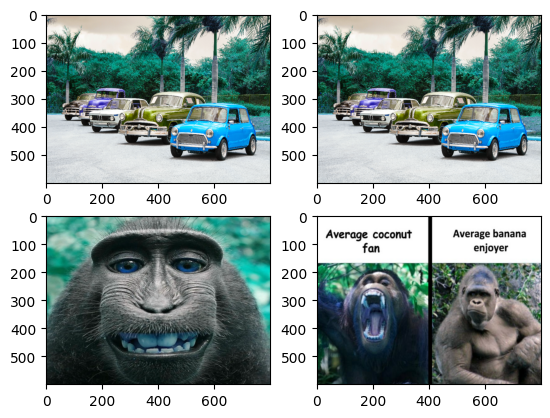

In [ ]:
from matplotlib import pyplot as plt

img = cv.imread(cv.samples.findFile("images/pexels-jose-mueses-1280560.jpg"))
resized_img = cv.resize(img,(800,600))

plt.subplot(221), plt.imshow(resized_img)
plt.subplot(222), plt.imshow(resized_img)

img = cv.imread(cv.samples.findFile("images/monke.jpg"))
resized_img = cv.resize(img,(800,600))

plt.subplot(223), plt.imshow(resized_img)

img = cv.imread(cv.samples.findFile("images/4rmrswy9jwr61.jpg"))
resized_img = cv.resize(img,(800,600))

plt.subplot(224), plt.imshow(resized_img)

px = img[100,100] # getting on pixel
print(px)

b,g,r = cv.split(img) # splitting image to separate colors (B,G,R) (Not RGB!)
# print(b)


### <font color='brown'>Adding images</font>

In [ ]:
python_logo = cv.imread(cv.samples.findFile("images/pythonLogo.png"))
opencv_logo = cv.imread(cv.samples.findFile("images/OpenCV_Logo.png"))
opencv_logo = cv.resize(opencv_logo,(250,250))
#logos = python_logo + opencv_logo
logos = opencv_logo + python_logo

cv.imshow("Python", python_logo)
cv.imshow("OpenCV", opencv_logo)
cv.imshow("Logos",logos)


cv.waitKey(0)
print("Window closed")

Window closed


### <font color='brown'>Blending images</font>

In [ ]:
python_logo = cv.imread(cv.samples.findFile("images/pythonLogo.png"))
opencv_logo = cv.imread(cv.samples.findFile("images/OpenCV_Logo.png"))
opencv_logo = cv.resize(opencv_logo,(250,250))
logos = cv.addWeighted(python_logo, 0.7, opencv_logo, 0.3, 0)

cv.imshow("Python", python_logo)
cv.imshow("OpenCV", opencv_logo)
cv.imshow("Logos",logos)


cv.waitKey(0)
print("Window closed")

Window closed


### <font color='brown'>Drawing in images</font>

In [ ]:
import numpy as np

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Lines
cv.line(img,(0,0),(511,511),(255,0,0),2)
cv.line(img,(511,0),(0,511),(0,255,0),2)

# Rectangle
cv.rectangle(img,(384,0),(510,128),(100,100,100),3)

# Circle
cv.circle(img,(255,255), 63, (0,0,255), 1)

cv.imshow("Img", img)
cv.waitKey(0)
print("Window closed")

Window closed


### <font color='brown'>Adding text to images</font>

In [ ]:
import numpy as np


# Create a black image
img2 = np.ones((512,512,3), np.uint8)

font = cv.FONT_HERSHEY_PLAIN

cv.putText(img2,"Hello Void!",(30,100), font,5,(0,255,0),4, cv.LINE_AA)
cv.putText(img2,"*Bottom*",(50,350), font,5,(0,255,0),4, cv.LINE_AA)
cv.putText(img2,"*text*",(100,450), font,5,(0,255,0),4, cv.LINE_AA)

cv.imshow("Img_new", img2)
cv.waitKey(0)
print("Window closed")

Window closed


### <font color='brown'>Color palette trackbars</font>

In [ ]:
import numpy as np
import cv2 as cv

def nothing(x):
    pass


img = np.zeros((300,512,3), np.uint8)
cv.namedWindow('image')
# create trackbars for color change
cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)
# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1)
    if k == ord("q"):
        break
    # get current positions of four trackbars
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0 
    else:
        img[:] = [b,g,r]
cv.destroyAllWindows()
print("closed")

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2581: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


### <font color='brown'>Color-spaces in OpenCV</font>

There are more than 150 color-space conversion methods available in OpenCV. 

The most widely used are BGR ↔ Gray and BGR ↔ HSV.

In [ ]:
# List of available color-spaces
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

BGR: B[0,255], G[0,255], R[0,255]

GRAY: gray[0,255]

HSV: hue[0,179], saturation[0,255], value[0,255]

### <font color='brown'>Color-spaces in OpenCV</font>

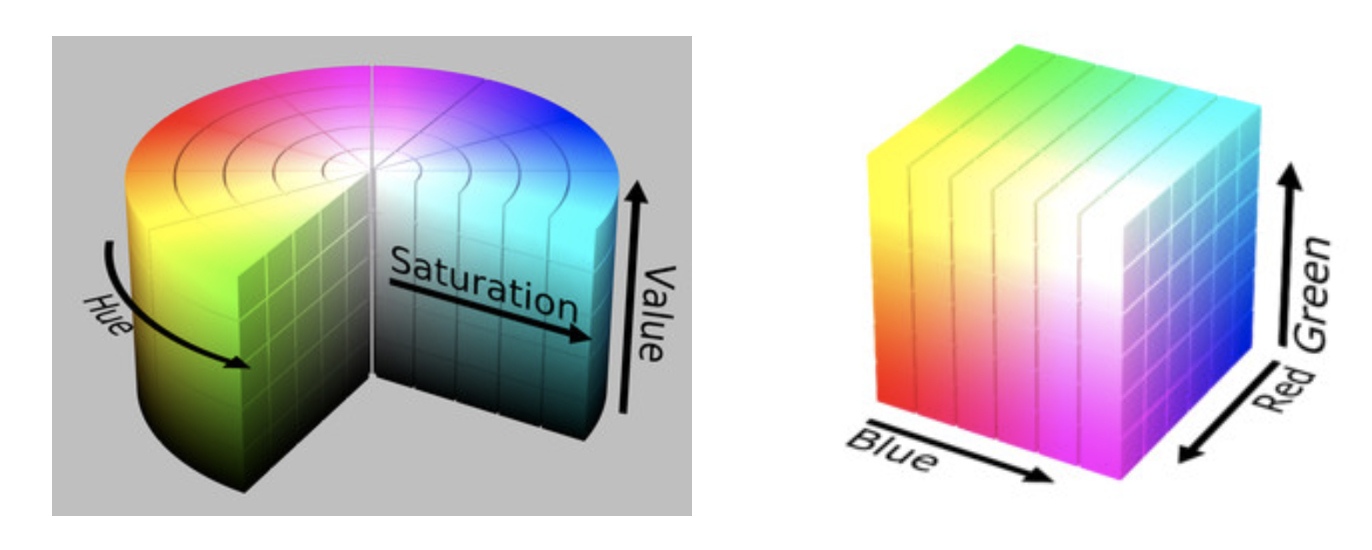

### <font color='brown'>Color-spaces in OpenCV</font>

In [ ]:
import cv2 as cv
cap = cv.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)

while(1):
    # Original - BRG
    _, frame = cap.read()
    
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    # Convert BGR to GRAY
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    cv.imshow('BRG',frame)
    cv.imshow('HSV',hsv)
    cv.imshow('GRAY', gray)

    k = cv.waitKey(1)
    if k == ord("q"):
        break
cv.destroyAllWindows()

### <font color='brown'>Color masks - blue</font>


In [ ]:
cap = cv.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)

while(1):
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)

    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    #cv.imshow('res',res)
    k = cv.waitKey(1)
    if k == ord("q"):
        break
cv.destroyAllWindows()

### <font color='brown'>Color masks - red</font>


In [ ]:
cap = cv.VideoCapture(0)
cap.set(3,500)
cap.set(4,500)

while(1):
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_red = np.array([0,150,190])
    upper_red = np.array([30,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_red, upper_red)

    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    #cv.imshow('res',res)
    k = cv.waitKey(1)
    if k == ord("q"):
        break
cv.destroyAllWindows()

### <font color='brown'>How to find HSV values?</font>


In [ ]:
green = np.uint8([[[0,255,0 ]]])
print(green)
hsv_green = cv.cvtColor(green,cv.COLOR_BGR2HSV)
print("HSV green: ", hsv_green )

[[[  0 255   0]]]
HSV green:  [[[ 60 255 255]]]


### <font color='brown'>Image thresholding</font>
In OpenCV it means to convert images to binary images. 
We distinguish:
- simple thresholding
- adaptive thresholding
- Otsu's binarisation

### <font color='brown'>Simple thresholding</font>
This performs a simple if condition. For every pixel, if its value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. 

General structure: 
ret, threshold = cv.threshold(img, threshold_value, max_value, thresholding_type)

Attention: The first argument of the function should be a grayscale image.

In [ ]:
# Importing image (BRG) fewjaofiewja f
img_brg = cv.imread("images/gradient.png")

# Converting to GRAY
img_gray = cv.cvtColor(img_brg, cv.COLOR_BGR2GRAY)

# Applying threshold
_, thresh = cv.threshold(img_gray, 167, 255, cv.THRESH_BINARY)

cv.imshow("Img_brg", img_brg)
cv.imshow("Img_gray", img_gray)
cv.imshow("Img_threshold", thresh)
cv.waitKey(0)
cv.destroyAllWindows()
print("Window closed")

Window closed


### <font color='brown'>Simple thresholding</font>

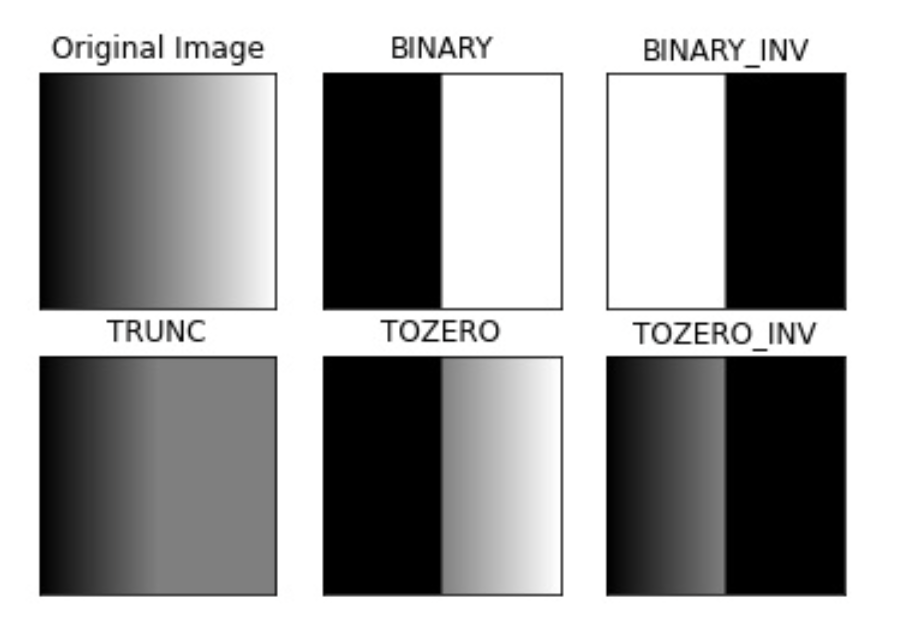

### <font color='brown'>Image smoothing</font>
- averaginng
- Gaussian blurring
- Median blurring
- Bilateral filtering

In [6]:
"""" Install necessary libraries """
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install matplotlib

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### <font color='brown'>Image smoothing</font>
- averaginng

Function cv.blur() convolving an image with a normaized box filter. 

A 3x3 normalized box filter would look like this:
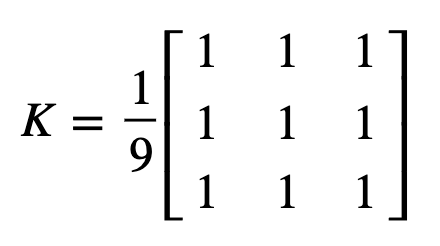


### <font color='brown'>Image smoothing</font>
- averaginng

In [ ]:
# Importing image
img = cv.imread('images/OpenCV_logo.png')

# Applying blur (kernel: 5x5)
blur = cv.blur(img,(100,100))



cv.imshow("Img", img)
cv.imshow("Img_blur", blur)
cv.waitKey(0)
cv.destroyAllWindows()
print("Window closed")

Window closed


### <font color='brown'>Morphological transformations</font>
- erosion (erodes away the boundaries of foreground (white) object)
- dillation (opposite to erosion)
- opening (erosion followed by dillation)
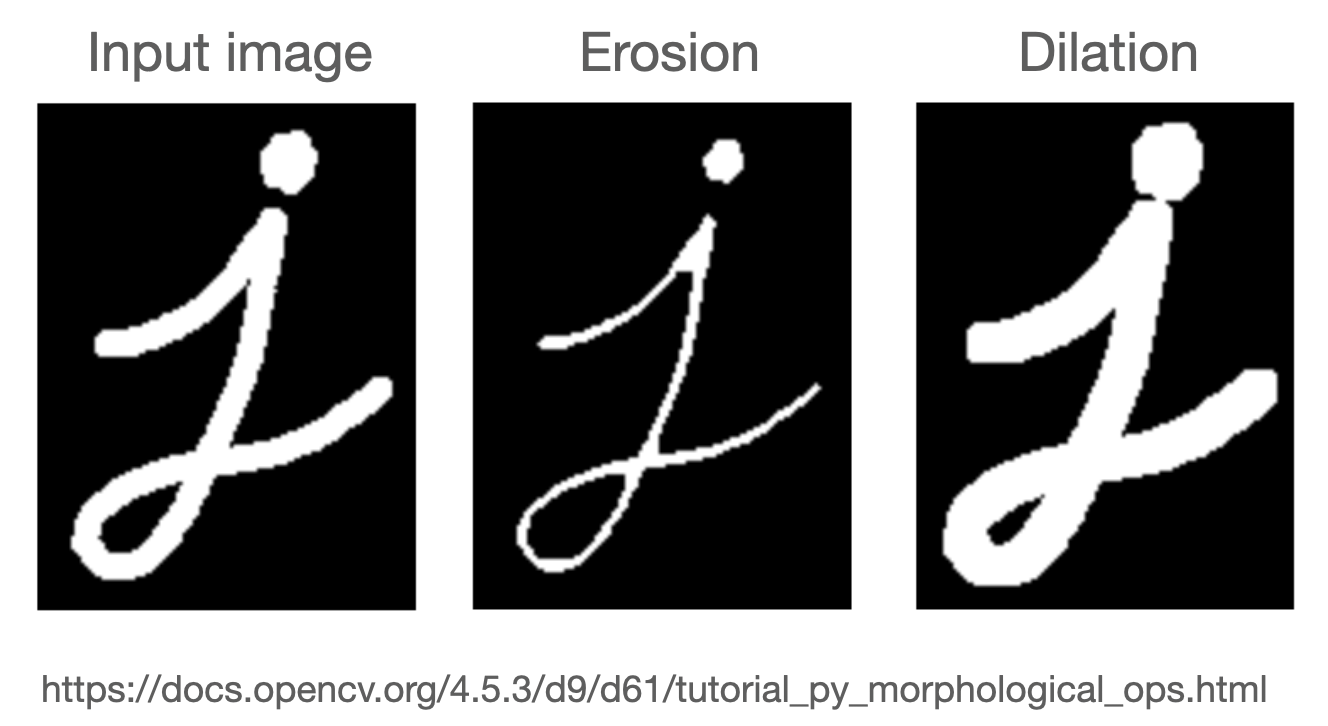

### <font color='brown'>Morphological transformations</font>
- erosion (erodes away the boundaries of foreground (white) object)
- dillation (opposite to erosion)
- opening (erosion followed by dillation)
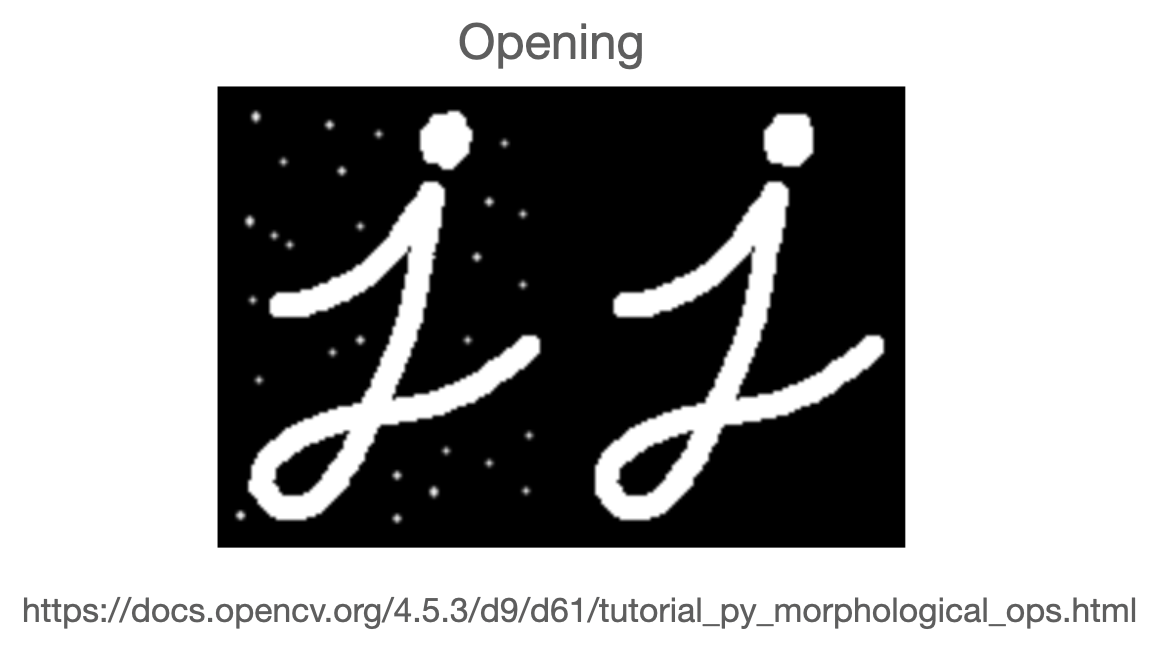

### <font color='brown'>Morphological transformations</font>
- erosion (erodes away the boundaries of foreground (white) object)
- dillation (opposite to erosion)
- opening (erosion followed by dillation)

In [ ]:

kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
dilation = cv.dilate(img,kernel,iterations = 1)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)



### <font color='brown'>Contours</font>
Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

- it works better for binary images
- threshold, erosion, dilatation, opening, canny edge detection are used in preparation for contours identification

In [ ]:
cap = cv.VideoCapture(0)

cap.set(3,640)
cap.set(4,480)

while(True):
    _, frame = cap.read()
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    _, thresh = cv.threshold(gray, 127, 255, 0)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    cv.drawContours(frame, contours, -1, (0,255,255), 2)
    # Frame display
    cv.imshow("frame",frame)
    cv.imshow("binary",thresh)
    key = cv.waitKey(1)
    if key == ord('q'):
        break

cap.release()
cv.destroyAllWindows()


### <font color='brown'>Objects identification with Haar Cascade algorithm</font>
Haar Cascade is an object detection algorithm used to detect faces in an image or a real time video.
The algorithm uses edge or line detection features. 

The algorithm is based on a training model which is available at the OpenCV GitHub repository:
https://github.com/opencv/opencv/tree/master/data/haarcascades

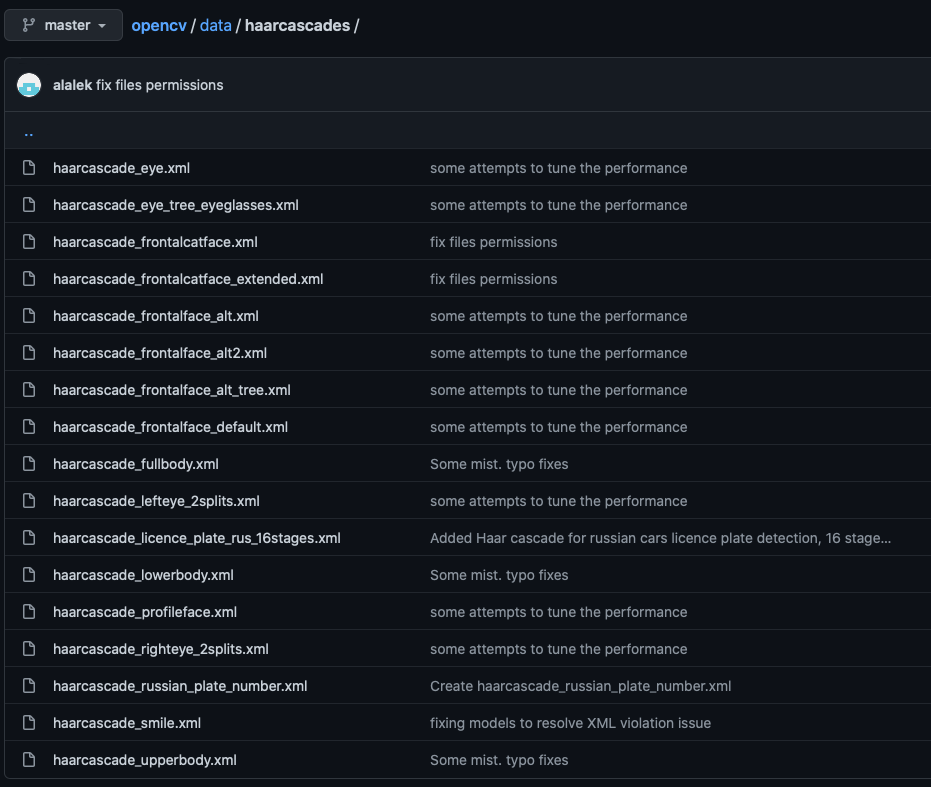

### <font color='brown'>Objects identification with Haar Cascade algorithm</font>

Typical function call:
faces = face_cascade.detectMultiScale(frame, scaleFactor=1.05, minNeighbors=15, minSize=[30,30])

where:

scaleFactor - Parameter specifying how much the image size is reduced at every stage of the image pyramid. More information is here: https://sites.google.com/site/5kk73gpu2012/assignment/viola-jones-face-detection#TOC-Image-Pyramid

minNeighbors - To optimise the identification. Higher value results in less detections but with higher quality.

minSize - Minimum possible object size. Smaller objects are ignored.

maxSize - Maximum possible object size. Bigger objects are ignored.

In [10]:
"""Example: Identifying and counting faces"""
import cv2 as cv
import numpy as np


face_cascade = cv.CascadeClassifier("C:\\Users\\darek\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml")

cap = cv.VideoCapture(0)
cap.set(3,640)

cap.set(4,480)
cap.set(10,100)

while(True):
    # Frame capture
    ret, frame = cap.read()
    gray = cv.cvtColor(frame, cv.COLOR_HSV2BGR)
    faces = face_cascade.detectMultiScale(frame, scaleFactor=1.05, minNeighbors=10, minSize=[2,2])

    n=len(faces)
    for (x,y,w,h) in faces:
        #print(x,y,w,h)
        color = (255,0,0) # BGR 0-255
        stroke = 2
        end_cord_x = x + w
        end_cord_y = y + h
        cv.rectangle(frame, (x,y), (end_cord_x, end_cord_y), color, stroke)

    font = cv.FONT_HERSHEY_PLAIN
    s = str(n)+ " students looking at camera"

    cv.putText(frame,s, (20, 50), font, 2, (0, 255, 0), 2, cv.LINE_AA)
    # Frame display
    cv.imshow("frame",frame)
    key = cv.waitKey(1)
    if key == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

### <font color='brown'>Introduction to the assignment</font>

Excercise 1.

Use OpenCV for automatic detection and count how many people participated in Solvay Conferences in 1911 and 1927 based on provided images: Solvay_conference_1927.jpeg and 1911_Solvay_conference.jpeg

Attention! A special grade is for identification of nobel prize winners. 

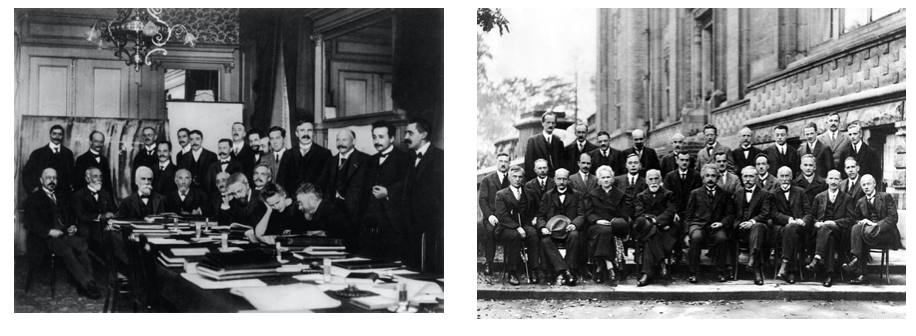



In [ ]:
# C:/Users/darek/AppData/Local/Programs/Python/Python310/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml

Kodzik do twarzy:

In [22]:
"""Example: Identifying and counting faces"""
import cv2 as cv
import numpy as np


face_cascade = cv.CascadeClassifier("C:\\Users\\darek\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_alt2.xml")

cap = cv.imread(cv.samples.findFile("images_assignment/Solvay_conference_1927.jpeg"))

# Frame capture
frame = cap
gray = cv.cvtColor(frame, cv.COLOR_HSV2BGR)
faces = face_cascade.detectMultiScale(frame, scaleFactor=1.01, minNeighbors=83, minSize=[5,5])



n=len(faces)
for (x,y,w,h) in faces:
    #print(x,y,w,h)
    color = (255,0,0) # BGR 0-255
    stroke = 2
    end_cord_x = x + w
    end_cord_y = y + h
    cv.rectangle(frame, (x,y), (end_cord_x, end_cord_y), color, stroke)


font = cv.FONT_HERSHEY_PLAIN
s = str(n)+ " Scientists detected by algorithm"

cv.putText(frame,s, (20, 50), font, 2, (0, 255, 0), 2, cv.LINE_AA)
# Frame display
cv.imshow("frame",frame)

cv.waitKey(0)
cv.destroyAllWindows()
print("Window closed")

Window closed


### <font color='brown'>Introduction to the assignment</font>

Excercise 2.

Use OpenCV for automatic detection, naming (on the screen) and counting all triangles, rectangulars and circles in the provided images: shapes_easy.png and shapes_medium.png
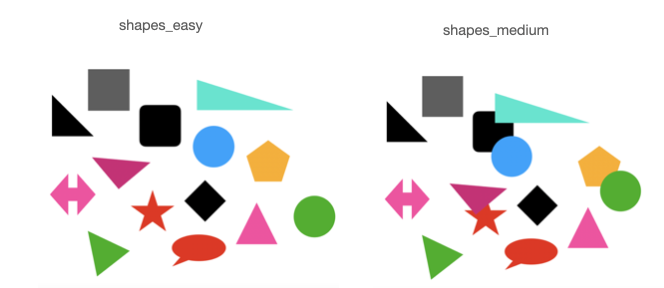

Possible approach:
- import image
- convert to grayscale
- apply thresholding, morphological transformations, canny edge detection etc.
- find contours (cv.findContours() and its parameters)
- draw contours (cv.DrawContorius() and its parameters) 
- classify the detected shape based on a number of contour points


Kodzik do figurek:

In [21]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
  
img = cv.imread('images_assignment/shapes_easy.png')
  
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  
_, threshold = cv.threshold(gray, 233, 255, cv.THRESH_BINARY)
  
contours, _ = cv.findContours(
    threshold, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
  
i = 0

for contour in contours:
  
    if i == 0:
        i = 1
        continue
  

    approx = cv.approxPolyDP(
        contour, 0.01 * cv.arcLength(contour, True), True)
      
    cv.drawContours(img, [contour], 0, (0, 0, 255), 4)
  
    M = cv.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
  
    if len(approx) == 3:
        cv.putText(img, 'Triangle', (x, y),
                    cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 4:
        cv.putText(img, 'Quadrilateral', (x, y),
                    cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
    elif len(approx) >= 14:
        cv.putText(img, 'Circle', (x, y),
                    cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
    else:
        cv.putText(img, 'Unidentified', (x, y),
                    cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

cv.namedWindow("shapes", cv.WINDOW_NORMAL)
cv.resizeWindow("shapes",1200,900)
cv.imshow('shapes', img)
  
cv.waitKey(0)
cv.destroyAllWindows()